<a href="https://colab.research.google.com/github/Jack-Cruz/decision_tree_model/blob/main/Arbol_de_decision_sklearn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tareas por realizar
Qué hacer cuando la data hacemos get dummies y encontramos un valor que no se ha visto en la data de entrenamiento.

# Insights a tratar

Columns del únicas del train:
- Education_primaria incompleta
- Education_universitario o tecnico completo: femenino
- Education_universitario o tecnico incompleto: femenino
- Medication preparation by_sin vincular

Columnas únicas del test:
- Education_primaria completa: Agregar al train
- Education_universitaria completa: Agregar al train
- Education_universitaria incompleta: Agregar al train
- Education_universitaria o tecnica completa: Modicar el train a femenino ("universitaria o tecnica completo", "universitaria o tecnica imcompleta")
- Medication preparation by_no vinculado: Modificar el test a "sin vincular"

# Análisis de datos

In [ ]:
# Explorando los datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
# Lectura de los datos desde el repositorio de Github

train_df = pd.read_csv("https://github.com/joao-arroyo/Datos/blob/434950ffbee0190ebb5ea8ab8b68bedf9448299e/DATA_TRAIN2.csv?raw=true")
test_df = pd.read_csv("https://github.com/joao-arroyo/Datos/blob/434950ffbee0190ebb5ea8ab8b68bedf9448299e/DATA_TEST2.csv?raw=true")

In [ ]:
# Se ha detectado un problema en la variable Education
# Se registra dos valores distintos pero con un mismo significado
# 'universitaria o tecnica incompleta' y 'universitario o tecnico incompleto'

train_df['Education'].unique()

array(['universitaria o tecnica completa', 'secundaria completa',
       'primaria incompleta', 'universitaria o tecnica incompleta',
       'secundaria incompleta'], dtype=object)

In [ ]:
# Preprocesamiento al train
# Cambiamos la variable 'Education' a femenino, especificamente de 'universitario o tecnico completo' a 'universitaria o tecnica completa'
# Cambiamos la variable 'Education' a femenino, especificamente de 'universitario o tecnico incompleto' a 'universitaria o tecnica incompleta'

train_df['Education'] = np.where(train_df['Education'] == 'universitario o tecnico completo', 'universitaria o tecnica completa', train_df['Education'])
train_df['Education'] = np.where(train_df['Education'] == 'universitario o tecnico incompleto', 'universitaria o tecnica incompleta', train_df['Education'])

In [ ]:
# Preprocesamiento al test (Es necesario un tratamiento previo a los datos)
# Cambiamos la variable 'Medication preparation by', especificamente de 'no vinculado' a 'sin vincular'

test_df['Medication preparation by'] = np.where(test_df['Medication preparation by'] == 'no vinculado', 'sin vincular', test_df['Medication preparation by'])

# Creación del modelo

In [ ]:
# Usamos el modelo 'DecisionTreeClassifier' de la librería 'sklearn'

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
# Importamos su versión, esto se usará en el despliegue

import sklearn
print(sklearn.__version__)

1.0.2


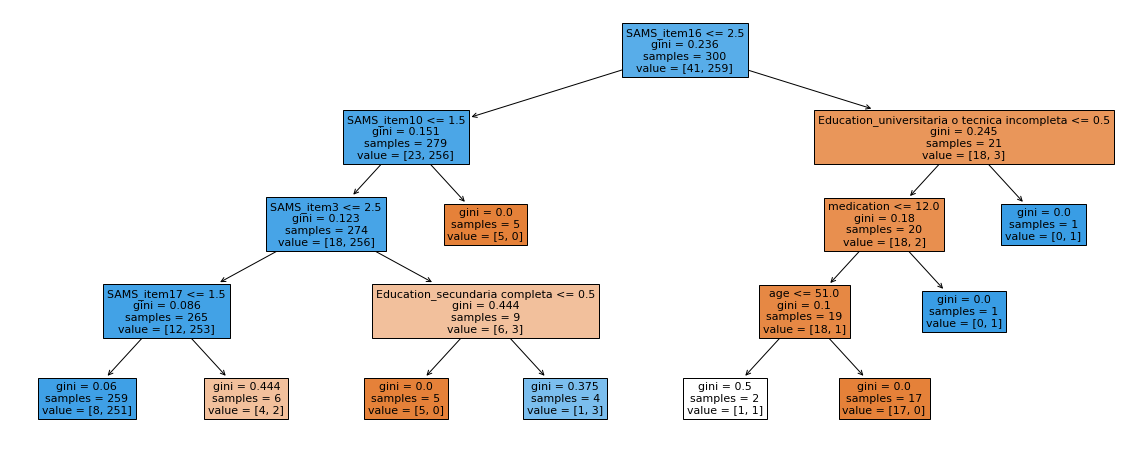

In [ ]:
## Modelo en base al proyecto de decision forest

X_train = train_df.iloc[:, 0:15] #solo agarro las columnas que necesito para el algoritmo
y_train = train_df.iloc[:, 17] #obtengo la columna que se servira como el output para el entrenamiento.

X_train = pd.get_dummies(data=X_train) # se convierte la tabla en binario


# Preprocesamiento del train
rows, _ = X_train.shape
X_train['Education_primaria completa'] = np.array(0)
X_train['Education_universitaria completa'] = np.array(0)
X_train['Education_universitaria incompleta'] = np.array(0)

#se instancia el modelo con una prefundidad de niveles de 4
model = DecisionTreeClassifier(max_depth=4)
#aqui se entrena el modelo 
model.fit(X_train.values, y_train)

#se dibuja el arbol de decision
plt.figure(figsize=(20, 8))
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True, fontsize=11)
plt.show()

# Testing

In [ ]:
X_test = test_df.iloc[:, 0:15]
y_test = test_df.iloc[:, 17]

X_test = pd.get_dummies(data=X_test) # se convierte la tabla en binario

# Preprocesamiento del test
X_test['Education_primaria incompleta'] = np.array(0)
X_test['Education_universitaria o tecnica completa'] = np.array(0)
X_test['Education_universitaria o tecnica incompleta'] = np.array(0)

## Testing del modelo
model.predict_proba(X_test)
y_pred = model.predict(X_test)
predicted = (y_pred == y_test)
print('accuracy:', sum(predicted) / len(predicted))

accuracy: 0.9069767441860465


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Ambos datasets son iguales X_train, X_test
set(X_train.columns) == set(X_test.columns)

True

In [ ]:
# Warning: problem with the data, columns doesn't match
X_train_cols = X_train.columns
X_test_cols = X_test.columns
print('X_train columns', len(X_train_cols))
print('X_test columns', len(X_test_cols))

print('Own column in X_test_cols')
for col in X_test_cols:
    if col not in X_train_cols:
        print('Column:', col)
print()
print('Own column in X_train_cols')
for col in X_train_cols:
    if col not in X_test_cols:
        print('Column:', col)

#assert X_train_cols.all() == X_test_cols.all()

X_train columns 26
X_test columns 26
Own column in X_test_cols

Own column in X_train_cols


In [ ]:
# Matriz de confusión
confusion_matrix(y_test, y_pred)

array([[ 11,   7],
       [  5, 106]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/di

Confusion matrix, without normalization
[[ 11   7]
 [  5 106]]
Normalized confusion matrix
[[0.61111111 0.38888889]
 [0.04504505 0.95495495]]


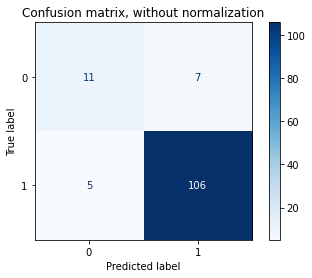

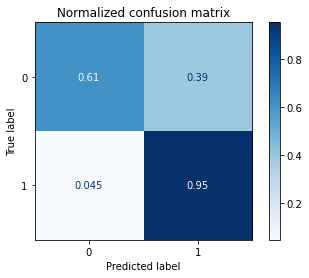

In [ ]:
# Gráfico de la matriz de confusión

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# Predecimos y obtenemos un output en porcentaje

y_pred_prob = model.predict_proba(X_test)
y_pred_prob[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.03088803, 0.96911197],
       [0.03088803, 0.96911197],
       [0.03088803, 0.96911197],
       [0.03088803, 0.96911197],
       [0.03088803, 0.96911197]])

In [ ]:
# Las primeros cinco registros de y_pred, la columna 1 (esta muestra la probabilidad de 'adherencia')

y_pred_prob[0:5,1]

array([0.96911197, 0.96911197, 0.96911197, 0.96911197, 0.96911197])

In [ ]:
# Métrica de AUC ROC

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7885385385385386

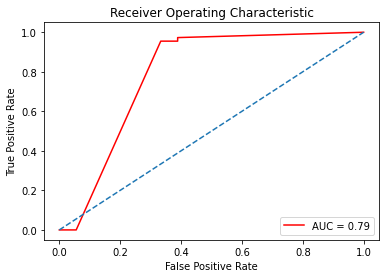

In [ ]:
# Gráfico de la curva AUC ROC

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.94      0.95      0.95       111

    accuracy                           0.91       129
   macro avg       0.81      0.78      0.80       129
weighted avg       0.90      0.91      0.90       129



# Exporting and last testing

In [ ]:
# Usamos la librería pickle para exportar el modelo

import pickle

In [ ]:
# Saving and exporting the model

with open('trained_model-0.1.0.pkl','wb') as f:
    pickle.dump(model, f)

In [ ]:
# El siguiente código, realiza un recorrido por toda la data del testeo, imprime su valor real, el predecido y sus valores (input).

from pandas.core.computation.ops import isnumeric
#Individual Test

def get_elem(test):
    base_elem = {'age':0, 'medication':0, 'SAMS_item1':0, 'SAMS_item3':0, 'SAMS_item6':0,
       'SAMS_item10':0, 'SAMS_item11':0, 'SAMS_item15':0, 'SAMS_item16':0,
       'SAMS_item17':0, 'SAMS_item19':0, 'sex_hombre':0, 'sex_mujer':0,
       'marital status_casado':0, 'marital status_soltero':0,
       'marital status_viudo o divorciado':0, 'Education_primaria incompleta':0,
       'Education_secundaria completa':0, 'Education_secundaria incompleta':0,
       'Education_universitaria o tecnica completa':0,
       'Education_universitaria o tecnica incompleta':0,
       'Medication preparation by_sin vincular':0,
       'Medication preparation by_vinculado':0, 'Education_primaria completa':0,
       'Education_universitaria completa':0,
       'Education_universitaria incompleta':0}
    for v, e in test.items():
        aux = str(e)
        if aux.isnumeric():
            base_elem[v] = e
        else:
            base_elem[v] = e
    return base_elem

rows, cols = X_test.shape

for i in range(rows): 
    test = X_test.iloc[i,:]
    base_elem = get_elem(test)
    
    data = list(base_elem.values())
    print('i:', i, end=', ')
    print('real:', y_test[i], end=', ')
    print('predicted:', model.predict([data]), end=', ')
    print('values:', base_elem)

i: 0, real: 1, predicted: [1], values: {'age': 77, 'medication': 4, 'SAMS_item1': 0, 'SAMS_item3': 0, 'SAMS_item6': 0, 'SAMS_item10': 0, 'SAMS_item11': 0, 'SAMS_item15': 0, 'SAMS_item16': 0, 'SAMS_item17': 0, 'SAMS_item19': 1, 'sex_hombre': 0, 'sex_mujer': 1, 'marital status_casado': 1, 'marital status_soltero': 0, 'marital status_viudo o divorciado': 0, 'Education_primaria incompleta': 0, 'Education_secundaria completa': 0, 'Education_secundaria incompleta': 0, 'Education_universitaria o tecnica completa': 0, 'Education_universitaria o tecnica incompleta': 0, 'Medication preparation by_sin vincular': 0, 'Medication preparation by_vinculado': 1, 'Education_primaria completa': 1, 'Education_universitaria completa': 0, 'Education_universitaria incompleta': 0}
i: 1, real: 1, predicted: [1], values: {'age': 78, 'medication': 3, 'SAMS_item1': 0, 'SAMS_item3': 0, 'SAMS_item6': 0, 'SAMS_item10': 0, 'SAMS_item11': 0, 'SAMS_item15': 0, 'SAMS_item16': 0, 'SAMS_item17': 0, 'SAMS_item19': 0, 'sex_

In [ ]:
# El siguiente pipeline es para configurar los datos de entrada al modelo. Esto se implementará en el código de la API.

def predict_pipeline(test):
    base_elem = {'age':0, 'medication':0, 'SAMS_item1':0, 'SAMS_item3':0, 'SAMS_item6':0,
       'SAMS_item10':0, 'SAMS_item11':0, 'SAMS_item15':0, 'SAMS_item16':0,
       'SAMS_item17':0, 'SAMS_item19':0, 'sex_hombre':0, 'sex_mujer':0,
       'marital status_casado':0, 'marital status_soltero':0,
       'marital status_viudo o divorciado':0, 'Education_primaria incompleta':0,
       'Education_secundaria completa':0, 'Education_secundaria incompleta':0,
       'Education_universitaria o tecnica completa':0,
       'Education_universitaria o tecnica incompleta':0,
       'Medication preparation by_sin vincular':0,
       'Medication preparation by_vinculado':0, 'Education_primaria completa':0,
       'Education_universitaria completa':0,
       'Education_universitaria incompleta':0}

    for k, e in test.items():
        aux = str(e)
        if aux.isnumeric():
            base_elem[k] = e
        else:
            key = k+'_'+e
            base_elem[key] = 1
    return base_elem

In [ ]:
# Tomar un registro de la data de test y preprocesarlo para la entrada al modelo

i = 1
example = test_df.iloc[i, 0:15]
print(example.to_dict())
example = example.to_dict()
example = predict_pipeline(example)
example = list(example.values())
model.predict([example])
print(example)

{'age': 78, 'sex': 'hombre', 'marital status': 'casado', 'Education': 'universitaria o tecnica completa', 'Medication preparation by': 'vinculado', 'medication': 3, 'SAMS_item1': 0, 'SAMS_item3': 0, 'SAMS_item6': 0, 'SAMS_item10': 0, 'SAMS_item11': 0, 'SAMS_item15': 0, 'SAMS_item16': 0, 'SAMS_item17': 0, 'SAMS_item19': 0}
[78, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]


# Ejemplos de prueba

Ejemplo de adherencia (Test 0).
{"age": 77, 
"sex": "mujer",
"marital_status": "casado",
"Education": "primaria completa",
"Medication_preparation_by": "vinculado",
"medication": 4,
"SAMS_item1": 0,
"SAMS_item3": 0,
"SAMS_item6": 0,
"SAMS_item10": 0,
"SAMS_item11": 0,
"SAMS_item15": 0,
"SAMS_item16": 0,
"SAMS_item17": 0,
"SAMS_item19": 1}

Ejemplo de no adherencia (Test 11).

{
"age": 83, 
"sex": "hombre", 
"marital_status": "viudo o divorciado", 
"Education": "universitaria incompleta", 
"Medication_preparation_by": "vinculado", 
"medication": 11, 
"SAMS_item1": 4, 
"SAMS_item3": 4, 
"SAMS_item6": 0, 
"SAMS_item10": 0, 
"SAMS_item11": 0, 
"SAMS_item15": 0, 
"SAMS_item16": 0, 
"SAMS_item17": 0, 
"SAMS_item19": 0
}

## Prueba 1: Ejecutamos la petición con el comando curl

La URL donde realizaremos la petición es: https://adherencia-detector.herokuapp.com/predict

In [ ]:
!curl -X 'POST' \
  'https://adherencia-detector.herokuapp.com/predict' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{ "age": 83, "sex": "hombre", "marital_status": "viudo o divorciado", "Education": "universitaria incompleta", "Medication_preparation_by": "vinculado", \
"medication": 11, "SAMS_item1": 4, "SAMS_item3": 4, "SAMS_item6": 0, "SAMS_item10": 0, "SAMS_item11": 0, "SAMS_item15": 0, "SAMS_item16": 0, "SAMS_item17": 0, "SAMS_item19": 0 }'

{"output":"No adherencia"}

## Prueba 2: Ejecutamos desde la documentación proporcionada por la API

Para ello accedemos al siguiente enlace: https://adherencia-detector.herokuapp.com/docs

Hacemos click en el método **POST predict/** (1), insertamos los datos (2), presionamos sobre 'Execute' para obtener la salida del modelo (3).

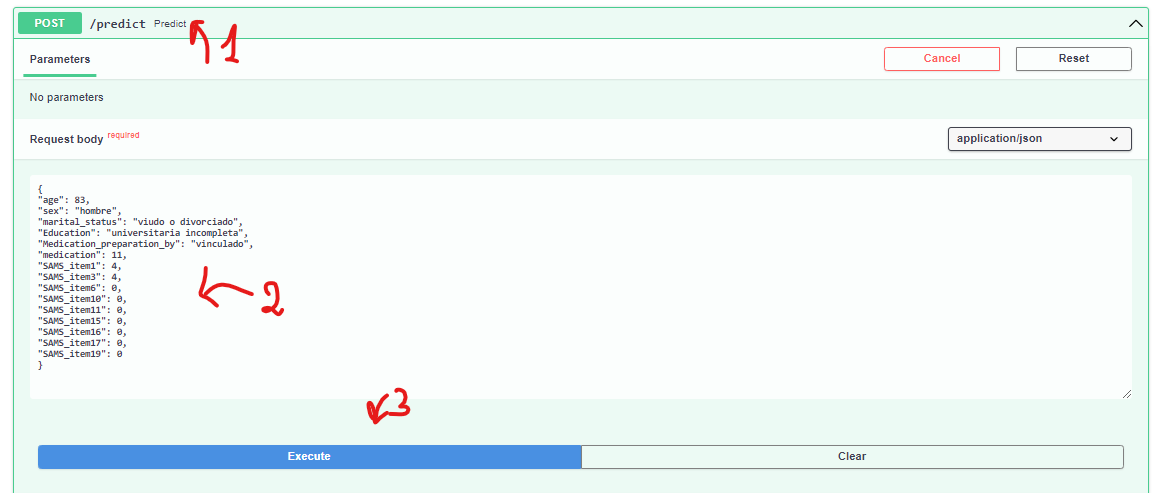

Se obtiene el siguiente resultado:

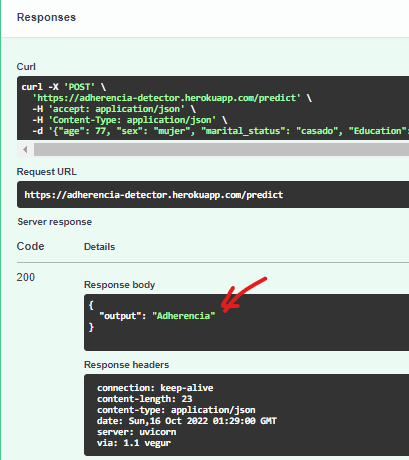


## Prueba 3: Ejecutamos desde Postman

Especificamos el método POST y la url del servidor (1), luego, insertamos la data en la pestaña de body, el tipo de body es JSON (2), por último le damos a 'Send' (3).

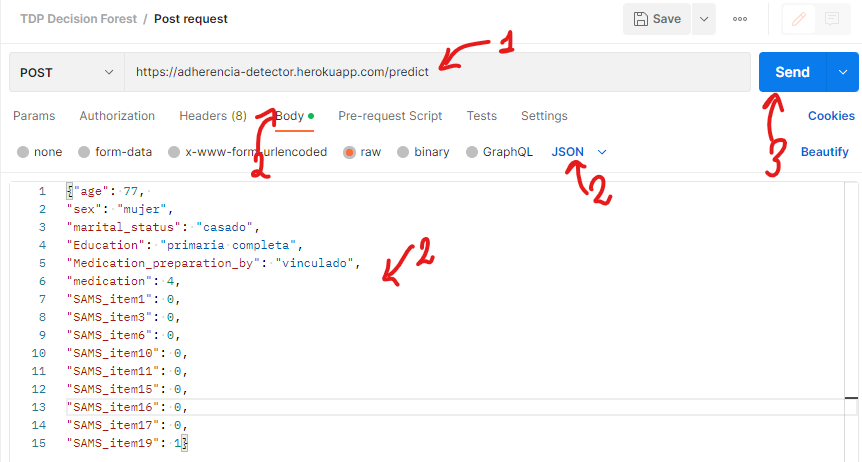

Obtenemos el siguiente resultado

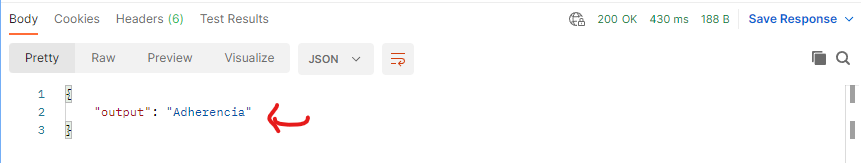

# Referencias

- Servidor API endpoint: https://adherencia-detector.herokuapp.com/predict
- Código del servidor API: https://github.com/Jack-Cruz/decision_tree_model
- Video sobre despliegue con FastAPI, Docker, y Heroku: https://www.youtube.com/watch?v=h5wLuVDr0oc